# Image filtering and correction
## Tasks
* Substract from the original image its filtered copy
* Filter Lena from salt and pepper
* Make intensity correction by R(x, y, sigma) = log[I(x, y)] — log[I(x, y)*G(x, y, sigma)]
,where G - gaussian, sigma - coef of blurring, * - convolution
remapping of image from (-1,1) to (0,255) with I = 255*I + 127


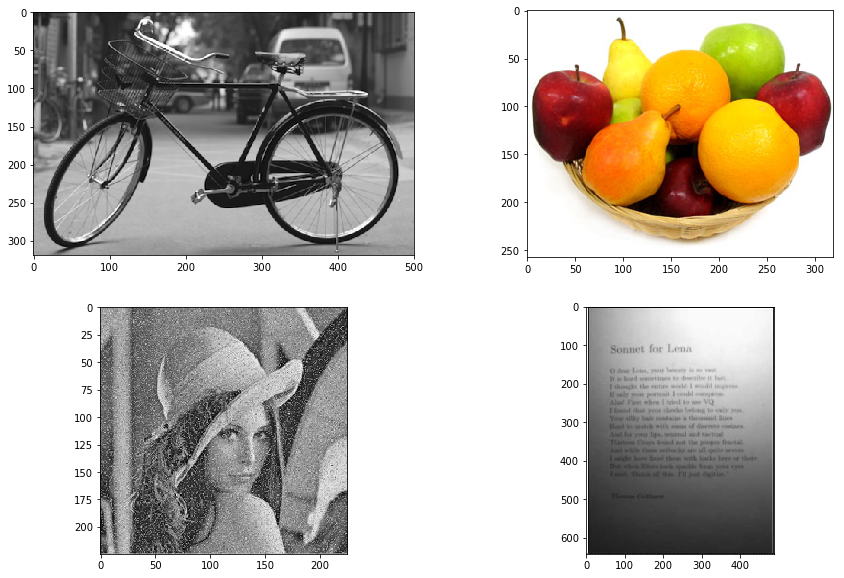

In [90]:
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
imbyc = img.imread('./bycicle.png')
imlen = img.imread('./lena.jpg')
imfru = img.imread('./unnamed.png')
imbook = img.imread('./book.png')
imlen2 = img.imread('./lena.png')
fig = plt.figure(figsize=(15,10))
plt.subplot(221)
plt.imshow(imbyc,cmap='gray')
plt.subplot(222)
plt.imshow(imfru)
plt.subplot(223)
plt.imshow(imlen)
plt.subplot(224)
plt.imshow(imbook)


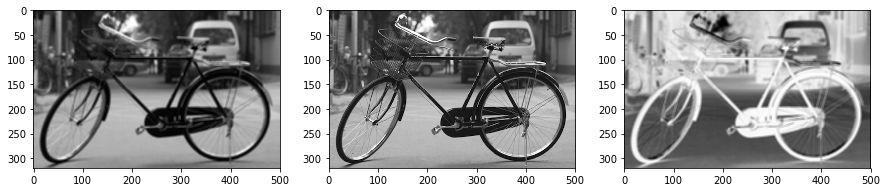

In [2]:
from scipy import ndimage
import numpy as np
k = np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])
flt = ndimage.convolve(imbyc, k, mode='nearest', cval=0.0)
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(flt,cmap='gray')
plt.subplot(132)
plt.imshow(imbyc,cmap='gray')
plt.subplot(133)
plt.imshow((imbyc-flt),cmap='gray')


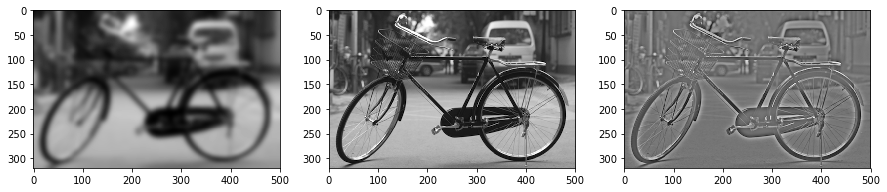

In [3]:
from scipy import ndimage as nimg
import numpy as np
gflt = nimg.gaussian_filter(imbyc, sigma=5)
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(gflt,cmap='gray')
plt.subplot(132)
plt.imshow(imbyc,cmap='gray')
plt.subplot(133)
plt.imshow((imbyc-gflt),cmap='gray')

-0.914264
0.666791


/Users/timur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log2


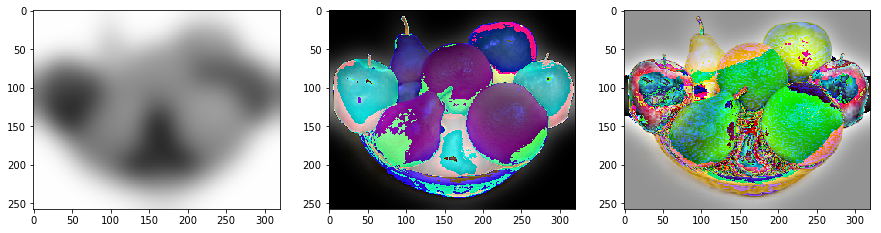

In [78]:
from scipy import ndimage as nimg
import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image
import numpy as np
imfru = img.imread('./unnamed.png')
gflt = nimg.gaussian_filter(imfru, sigma=15)
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(gflt,cmap='gray')
plt.subplot(132)
plt.imshow(imfru,cmap='gray')
plt.imshow((imfru-gflt), cmap = 'gray')
maxValue = (imfru - gflt).max()
minValue = (imfru - gflt).min()
print(minValue)
print(maxValue)
diff = np.log2(imfru) - np.log2(gflt)
newImage = (diff-minValue)/(maxValue-minValue)
plt.subplot(133)
plt.imshow((newImage),cmap='gray')
plt.show()

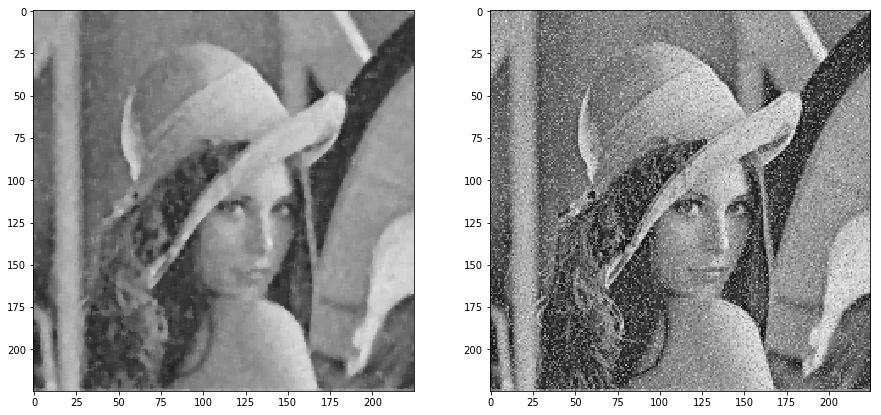

In [30]:
from scipy import ndimage as nimg
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
imlen = img.imread('./lena.jpg')
gflt = nimg.median_filter(imlen, 4)
fig = plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(gflt, cmap = 'gray')
plt.subplot(122)
plt.imshow(imlen, cmap = 'gray')

plt.show()

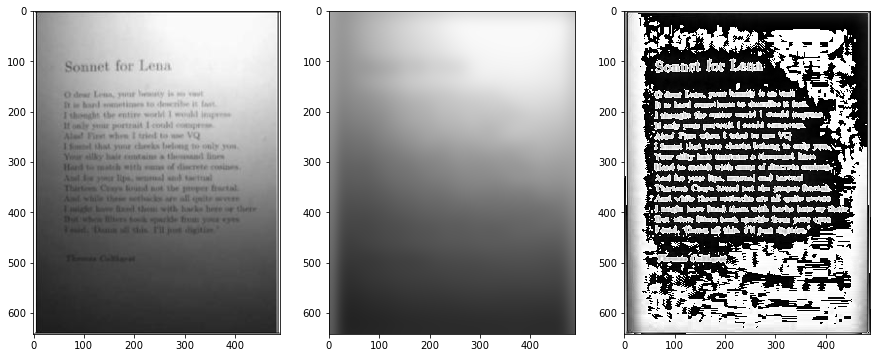

In [48]:
from scipy import ndimage as nimg
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
%matplotlib inline

imbook = img.imread('./book.png')
gflt = nimg.gaussian_filter(imbook, sigma= 14.7)
fig = plt.figure(figsize=(15,10))

plt.subplot(131)
plt.imshow(imbook, cmap = 'gray')

plt.subplot(132)
plt.imshow(gflt, cmap = 'gray')
gflt2 = imbook/gflt
plt.subplot(133)
plt.imshow(gflt2, cmap = 'gray')
plt.show()

0.621839
-0.555851


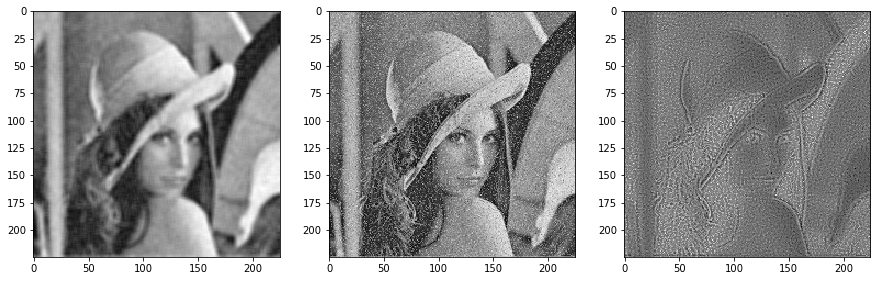

In [92]:
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import ndimage
from scipy import misc

from PIL import Image
import numpy as np
%matplotlib inline
# imlen = Image.open('./lena.jpg').convert("L")
#imlen = misc.imread('./lena.png',mode="L")
#print(imlen.shape)
imlen = img.imread('./lena.png')


k = np.array([[1,1,1,1,1],
              [1,1,1,1,1],
              [1,1,1,1,1],
              [1,1,1,1,1],
              [1,1,1,1,1]])
flt = ndimage.convolve(imlen, k, mode='nearest', cval=0.0)
fmin = flt.min()
fmax = flt.max()
flt = (flt-fmin)/(fmax-fmin)

fig = plt.figure(figsize=(15,10))


plt.subplot(131)
plt.imshow(flt,cmap='gray')
plt.subplot(132)
plt.imshow(imlen,cmap='gray')
maxValue = (imlen-flt).max()
print(maxValue)
minValue = (imlen-flt).min()
print(minValue)
plt.subplot(133)
plt.imshow(imlen-flt,cmap='gray')
plt.show()


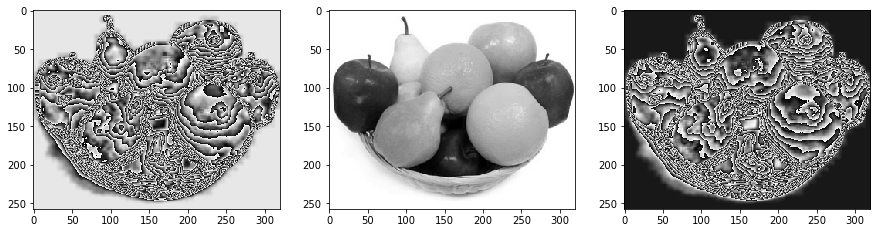

In [95]:
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import ndimage
from PIL import Image
import numpy as np
%matplotlib inline
imfru = Image.open('./unnamed.png').convert('L')


k = np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])
flt = ndimage.convolve(imfru, k, mode='nearest', cval=0.0)
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(flt,cmap='gray')
plt.subplot(132)
plt.imshow(imfru,cmap='gray')
plt.subplot(133)
plt.imshow((imfru-flt),cmap='gray')
plt.show()

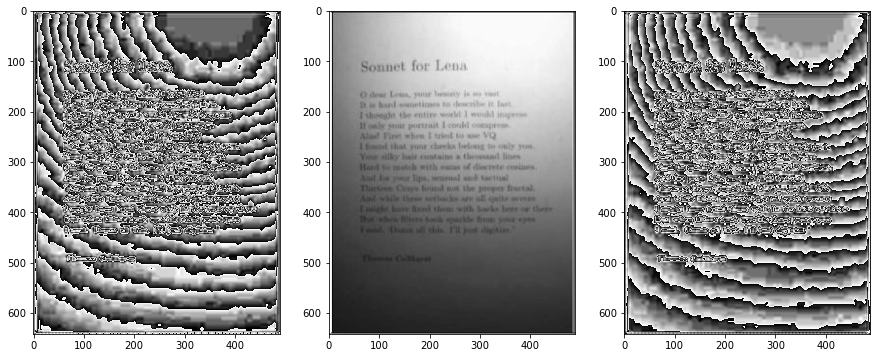

In [50]:
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import ndimage
from PIL import Image
import numpy as np
%matplotlib inline
imbook = Image.open('./book.png').convert('L')


k = np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])
flt = ndimage.convolve(imbook, k, mode='nearest', cval=1.0)
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(flt,cmap='gray')
plt.subplot(132)
plt.imshow(imbook,cmap='gray')
plt.subplot(133)
plt.imshow((imbook-flt),cmap='gray')
plt.show()

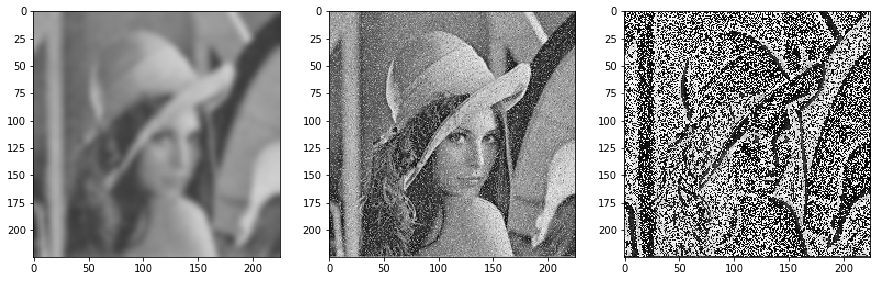

In [39]:
from scipy import ndimage as nimg
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
imlen = img.imread('./lena.jpg')
gflt = nimg.gaussian_filter(imlen, sigma=3)
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(gflt, cmap = 'gray')
plt.subplot(132)
plt.imshow(imlen, cmap = 'gray')
plt.subplot(133)
plt.imshow(imlen-gflt, cmap = 'gray')
plt.show()

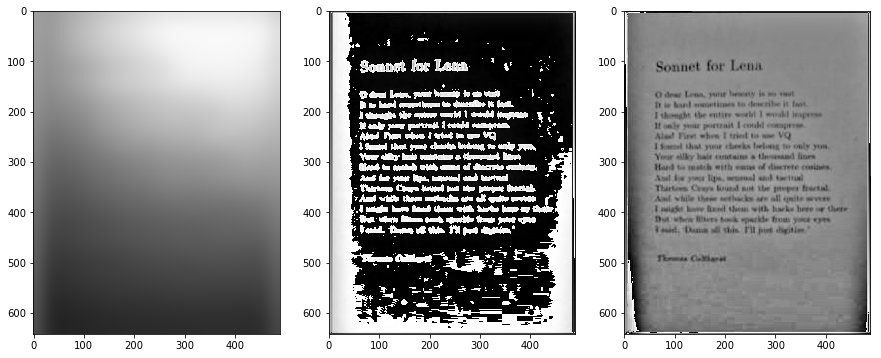

In [55]:
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import ndimage as nimg 
import numpy as np
imbook = img.imread('./book.png')
gflt = nimg.gaussian_filter(imbook, sigma = 20)
fig = plt.figure(figsize=(15, 10))
plt.subplot(131)
plt.imshow(gflt, cmap='gray')
plt.subplot(132)
plt.imshow(imbook, cmap = 'gray')
plt.imshow((imbook-gflt), cmap = 'gray')
maxValue = (imbook - gflt).max()
minValue = (imbook - gflt).min()
diff = np.log2(imbook) - np.log2(gflt)
newImage = (diff-minValue)/(maxValue-minValue)


plt.subplot(133)
plt.imshow(newImage, cmap='gray')
plt.show()

In [86]:
from scipy import ndimage
import numpy as np
k = np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])
flt = ndimage.convolve(imlen2, k, mode='nearest', cval=0.0)
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(flt,cmap='gray')
plt.subplot(132)
plt.imshow(imlen2,cmap='gray')
fmax = (imlen2 - flt).max()
print(fmax)
plt.subplot(133)
plt.imshow((imlen2-flt),cmap='gray')

RuntimeError: filter weights array has incorrect shape.